<b>

<p>
<center>
<font size="5">
Natural Language Processing (Spring 2020)
</font>
</center>
</p>

<p>
<center>
<font size="4">
PROJECT: AUTOMATIC TERMINOLOGY ANALYSIS FOR DATA SCIENCE JOB DESCRIPTIONS 
</font>
</center>
</p>

<p>
<center>
<font size="3">
Authors: Anwesha Tomar, Marta Matosas Fonolleda, Sandra Valdes Salas
</font> 
</center>
</p>

<p>
<center>
<font size="3">
Part 4: Analysis of data science terms by 2 dimensions: geography and industry
</font> 
</center>
</p>

### Setup Google Colab

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
%cd /content/drive/My\ Drive/GWU/Natural\ Language\ Processing/Project_final

/content/drive/My Drive/GWU/Natural Language Processing/Project_final


# 1) Load Data

## 1.1 Import libraries

In [4]:
import pandas as pd
import spacy.cli
spacy.cli.download("en_core_web_sm")

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [5]:
import nltk.data
from nltk.tokenize import TreebankWordTokenizer
from nltk.util import bigrams 
from nltk.stem import WordNetLemmatizer
import nltk
from string import punctuation
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
sentence_tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
treebank_tokenizer = TreebankWordTokenizer()
stopwords = nltk.corpus.stopwords.words("english")
wordnet_lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [0]:
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS 

## 1.2 Load dataframe

In [0]:
#Load dataframe
df_datascience = pd.read_pickle("./all_data/datascience_complete_terms")

## 1.3 Required functions for processing the data

In [0]:
# Load NLTK customized stopwords
custom_nltk_stopwords_list = open('./all_data/customized_stopwords_for_ngrams.txt').read().split('\n')

In [0]:
def get_corpus(df):
    df_lists_of_texts = df['final_text'].to_list()
    corpus = []
    for string in df_lists_of_texts:
        corpus.append(string)
        
    return corpus

In [0]:
def get_frequencies(list_tokens):
    """
    This function returns a dictionary of terms sorted by their frequencies.
    """
    freq = {}
    for token in list_tokens:
        if token not in freq.keys():
            freq[token]=1
        else:
            freq[token]+=1
    
    sorted_tuples = sorted(freq.items(), key=lambda x:x[1], reverse=True)

    return dict(sorted_tuples)

In [0]:
def clean_tokens_nltk(text):
    # Remove digits and convert to lower case
    job_description2 = ''.join(word.lower() for word in text if not word.isdigit())
    # Remove punctuation
    job_description3 = ''.join(word for word in job_description2 if word not in punctuation)
    # tokenize
    job_tokens = treebank_tokenizer.tokenize(job_description3)
    # exclude customized stop words
    job_tokens_cleaned = [word for word in job_tokens if word not in custom_nltk_stopwords_list]
    # Lemmatize
    job_tokens_lemmatized = [wordnet_lemmatizer.lemmatize(word) for word in job_tokens_cleaned]

    return job_tokens_lemmatized

In [0]:
def sort_ngrams(freq_ngrams):
    bigrams_result = {}
    for k,v in freq_ngrams.items():
        bigrams_result[k]=v
    
    # Sort result based on values
    bigrams_sorted = sorted(bigrams_result.items(), key=lambda t:t[-1], reverse=True)
    
    return bigrams_sorted

In [0]:
def cal_terms(df_city_industry):
    df_corpus = get_corpus(df_city_industry)
    # Extract all terms
    df_all_terms = df_city_industry['terms'].to_list()
    # Create a flat list with all keywords
    df_terms = [item for sublist in df_all_terms for item in sublist]
    df_terms_frequencies = get_frequencies(df_terms)
    p_uni = dict(list(df_terms_frequencies.items())[0: 10]) 
    #print(p_uni)
    # Call function
    df_job_tokens = clean_tokens_nltk(df_corpus)
    # Generate bigrams 
    df_bigrams = nltk.bigrams(df_job_tokens)
    df_freq_bigrams = nltk.FreqDist(df_bigrams)
    df_bigrams_result = sort_ngrams(df_freq_bigrams)
    p_bi = df_bigrams_result[0: 10]
    return p_bi,p_uni

In [0]:
def clean_bi_uni(bigram,unigram):    
    names=[]
    freq=[]
    for i in range(0, len(bigram)):
        names.append(bigram[i][0])
        freq.append(bigram[i][1])
        df_final=[]
        for i in range(len(names)):
            b_1 = ''
            for j in range(0, 2):
                word = ''.join(names[i][j])
                b_1 += word + ' '
            df_final.append(b_1.strip())
    for k in unigram.keys():
        df_final.append(k)
    for v in unigram.values():
        freq.append(v) 
    return df_final,freq

In [0]:
def generate_dict(val,fre):
    res = {} 
    for key,value in zip(val,fre): 
        res[key] = value   
    return res

In [16]:
import pandas as pd
import spacy.cli
spacy.cli.download("en_core_web_sm")

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


# 2) Preprocessing

## 2.1 Create sub dataframes for cities 

In [17]:
datascience_cities_count = df_datascience['city'].value_counts()
df_cities_count = pd.DataFrame([datascience_cities_count]).transpose()
df_cities_count

,city
dc,581
new-york,357
austin,325
san-francisco,149
los-angeles,71
chicago,67


In [18]:
df_dc = df_datascience[df_datascience['city'] == 'dc']
df_dc.shape

(581, 12)

In [19]:
df_ny = df_datascience[df_datascience['city'] == 'new-york']
df_ny.shape

(357, 12)

In [20]:
df_austin = df_datascience[df_datascience['city'] == 'austin']
df_austin.shape

(325, 12)

In [21]:
df_sf = df_datascience[df_datascience['city'] == 'san-francisco']
df_sf.shape

(149, 12)

In [22]:
df_la = df_datascience[df_datascience['city'] == 'los-angeles']
df_la.shape

(71, 12)

In [23]:
df_ch = df_datascience[df_datascience['city'] == 'chicago']
df_ch.shape

(67, 12)

## 2.2 Explore distribution of industries (all cities)

In [24]:
df_count = df_datascience['industry'].value_counts()
df_industry = pd.DataFrame([df_count ]).transpose()
df_industry

,industry
Human Resources and Staffing,157
Consulting and Business Services,136
Internet and Software,117
Aerospace and Defense,92
Insurance,48
Banks and Financial Services,42
"Media, News and Publishing",28
Health Care,14
Retail,10
Government,10


## 2.3 Explore distribution of industries by city

### 2.2.1 DC

In [25]:
#Get total count per industry 
df_dc_count = df_dc['industry'].value_counts()
df_dc_industry = pd.DataFrame([df_dc_count]).transpose()
df_dc_industry

,industry
Aerospace and Defense,91
Consulting and Business Services,90
Insurance,40
Internet and Software,9
Government,6
Banks and Financial Services,5
Health Care,5
Organization,3
Pharmaceuticals,1
Computers and Electronics,1


### 2.2.2 New York

In [26]:
#Get total count per industry 
df_ny_count = df_ny['industry'].value_counts()
df_ny_industry = pd.DataFrame([df_ny_count]).transpose()
df_ny_industry

,industry
Human Resources and Staffing,126
Consulting and Business Services,35
Banks and Financial Services,31
"Media, News and Publishing",23
Internet and Software,13
Health Care,4
Retail,3
Pharmaceuticals,3
Insurance,3
Government,2


### 2.2.3 Austin

In [27]:
#Get total count per industry 
df_austin_count = df_austin['industry'].value_counts()
df_austin_industry = pd.DataFrame([df_austin_count]).transpose()
df_austin_industry

,industry
Internet and Software,74
Computers and Electronics,4
Retail,1


### 2.2.4 San Francisco

In [28]:
df_sf_count = df_sf['industry'].value_counts()
df_sf_industry = pd.DataFrame([df_sf_count]).transpose()
df_sf_industry

,industry
Internet and Software,19
Retail,5
Banks and Financial Services,5
Consulting and Business Services,4
Health Care,2
"Media, News and Publishing",2
Consumer Goods and Services,2
Transport and Freight,2
Real Estate,1
Insurance,1


### 2.2.5 Los Angeles

In [29]:
df_la_count = df_la['industry'].value_counts()
df_la_industry = pd.DataFrame([df_la_count]).transpose()
df_la_industry

,industry
Human Resources and Staffing,29
"Media, News and Publishing",3
Consulting and Business Services,3
Insurance,2
Internet and Software,1
Pharmaceuticals,1
Energy and Utilities,1
Health Care,1
Banks and Financial Services,1
Aerospace and Defense,1


### 2.2.6 Chicago

In [30]:
df_ch_count = df_ch['industry'].value_counts()
df_ch_industry = pd.DataFrame([df_ch_count]).transpose()
df_ch_industry

,industry
Consulting and Business Services,4
Consumer Goods and Services,2
Insurance,2
Health Care,2
Food and Beverages,1
Internet and Software,1
Education and Schools,1
Real Estate,1
Government,1
Human Resources and Staffing,1


# 3) Analysis

## 3.1 Unique terms for each city (dimension Geography)

### 3.1.1 DC

In [0]:
#DC
bi_dc,uni_dc=cal_terms(df_dc)
value_dc,frequency_dc=clean_bi_uni(bi_dc,uni_dc)
gen_dict_dc=generate_dict(value_dc,frequency_dc)

In [32]:
#terms
gen_dict_dc.keys()

dict_keys(['machine learning', 'civic engagement', 'shell scripting', 'year experience', 'dental vision', 'best practice', 'ideal candidate', 'bachelor degree', 'predictive model', 'statistic machine', 'vpc', 'python', 'modeling', 'algorithm', 'hadoop', 'bachelor', 'passion', 'scripting', 'linux', 'cvi'])

In [33]:
#frequencies
gen_dict_dc.values()

dict_values([873, 255, 170, 159, 156, 147, 139, 136, 134, 132, 510, 500, 500, 378, 282, 208, 191, 189, 181, 170])

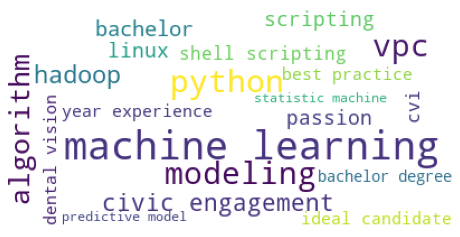

In [40]:
plt.figure(figsize = (8, 8), facecolor = None) 
wc_dc = WordCloud(background_color="white").generate_from_frequencies(gen_dict_dc)
plt.axis("off") 
plt.imshow(wc_dc)
plt.savefig('wordcloud_dc.png')

### 3.1.2 New York

In [0]:
#NY
bi_ny,uni_ny=cal_terms(df_ny)
value_ny,frequency_ny=clean_bi_uni(bi_ny,uni_ny)
gen_dict_ny=generate_dict(value_ny,frequency_ny)

In [0]:
#terms
gen_dict_ny.keys()

dict_keys(['machine learning', 'year experience', 'solve complex', 'learning model', 'predictive modeling', 'complex problem', 'year professional', 'help solve', 'degree statistic', 'compensation package', 'modeling', 'python', 'visualization', 'stakeholder', 'methodology', 'dashboard', 'dataset', 'skillsexperience', 'learningcreate', 'modelsbachelor'])

In [0]:
#frequencies
gen_dict_ny.values()

dict_values([231, 156, 107, 100, 98, 96, 96, 92, 86, 83, 195, 175, 132, 122, 106, 88, 88, 83, 79, 79])

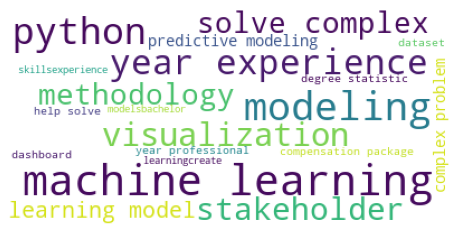

In [0]:
plt.figure(figsize = (8, 8), facecolor = None) 
wc_ny = WordCloud(background_color="white").generate_from_frequencies(gen_dict_ny)
plt.axis("off") 
plt.imshow(wc_ny)

### 3.1.3 Austin

In [0]:
#austin
bi_austin,uni_austin=cal_terms(df_austin)
value_austin,frequency_austin=clean_bi_uni(bi_austin,uni_austin)
gen_dict_austin=generate_dict(value_austin,frequency_austin)

In [0]:
#terms
gen_dict_austin.keys()

dict_keys(['machine learning', 'best practice', 'year experience', 'quantitative field', 'predictive modeling', 'experience working', 'natural language', 'math statistic', 'language processing', '3 year', 'algorithm', 'python', 'math', 'stack', 'visualization', 'modeling', 'aws', 'hadoop', 'optimization', 'stakeholder'])

In [0]:
#frequencies
gen_dict_austin.values()

dict_values([404, 154, 90, 82, 80, 80, 79, 79, 78, 78, 310, 169, 155, 151, 87, 86, 83, 83, 81, 79])

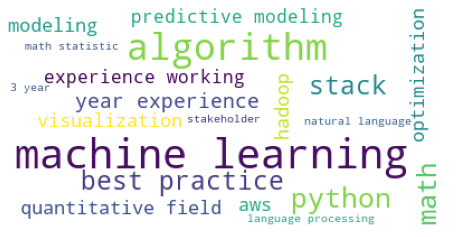

In [0]:
plt.figure(figsize = (8, 8), facecolor = None) 
wc_austin = WordCloud(background_color="white").generate_from_frequencies(gen_dict_austin)
plt.axis("off") 
plt.imshow(wc_austin)

### 3.1.4 San Francisco

In [0]:
#san-fransico
bi_sf,uni_sf=cal_terms(df_sf)
value_sf,frequency_sf=clean_bi_uni(bi_sf,uni_sf)
gen_dict_sf=generate_dict(value_sf,frequency_sf)

In [0]:
#terms
gen_dict_sf.keys()

dict_keys(['machine learning', 'year experience', 'statistical model', 'product team', 'quantitative field', 'scientist engineer', 'apply statistical', 'experiment build', 'looking talented', 'model identify', 'python', 'algorithm', 'modeling', 'sem', 'dashboard', 'fto', 'keyword', 'optimization', 'stack', 'visualization'])

In [0]:
#frequencies
gen_dict_sf.values()

dict_values([209, 85, 38, 38, 32, 29, 29, 28, 28, 28, 120, 119, 74, 52, 40, 39, 39, 36, 35, 34])

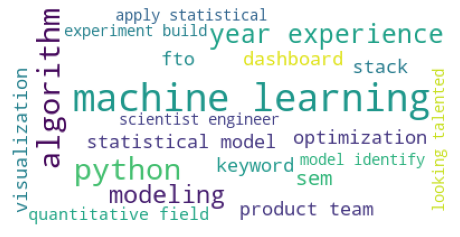

In [0]:
plt.figure(figsize = (8, 8), facecolor = None) 
wc_sf = WordCloud(background_color="white").generate_from_frequencies(gen_dict_sf)
plt.axis("off") 
plt.imshow(wc_sf)

### 3.1.5 Los Angeles

In [0]:
#los angeles
bi_la,uni_la=cal_terms(df_la)
value_la,frequency_la=clean_bi_uni(bi_la,uni_la)
gen_dict_la=generate_dict(value_la,frequency_la)

In [0]:
#terms
gen_dict_la.keys()

dict_keys(['machine learning', 'statistical machine', 'python r', 'relational database', 'time series', 'skill experience', 'year relevant', 'relevant experience', 'learning technique', 'version eg', 'python', 'visualization', 'algorithm', 'regression', 'scikit', 'clustering', 'graph', 'ordinance', 'git', 'proficiency'])

In [0]:
#frequencies
gen_dict_la.values()

dict_values([135, 60, 36, 34, 32, 32, 32, 31, 31, 31, 61, 48, 47, 38, 37, 35, 35, 33, 32, 32])

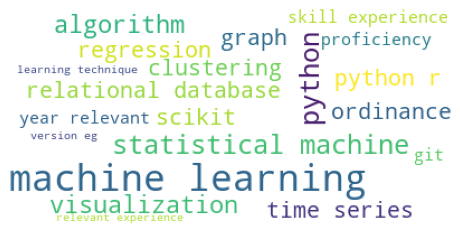

In [0]:
plt.figure(figsize = (8, 8), facecolor = None) 
wc_la = WordCloud(background_color="white").generate_from_frequencies(gen_dict_la)
plt.axis("off") 
plt.imshow(wc_la)

### 3.1.6 Chicago

In [0]:
#chicago
bi_ch,uni_ch=cal_terms(df_ch)
value_ch,frequency_ch=clean_bi_uni(bi_ch,uni_ch)
gen_dict_ch=generate_dict(value_ch,frequency_ch)

In [0]:
#terms
gen_dict_ch.keys()

dict_keys(['machine learning', 'year experience', '2 year', 'least 2', 'testing deploying', 'quantitative field', 'building testing', 'experience generating', 'generating implementing', 'implementing shortterm', 'python', 'modeling', 'algorithm', 'visualization', 'aws', 'phd', 'hadoop', 'stakeholder', 'git', 'dataset'])

In [0]:
#frequencies
gen_dict_ch.values()

dict_values([84, 30, 18, 15, 15, 14, 14, 14, 14, 14, 46, 34, 23, 19, 18, 17, 16, 15, 12, 11])

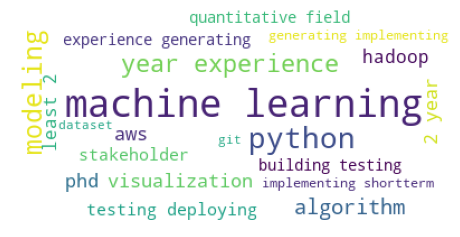

In [0]:
plt.figure(figsize = (8, 8), facecolor = None) 
wc_ch = WordCloud(background_color="white").generate_from_frequencies(gen_dict_ch)
plt.axis("off") 
plt.imshow(wc_ch)

## 3.2 Analysis by industry (dimension industry)

In [0]:
# Create sub dataframes for industry
df_banks = df_datascience[df_datascience['industry'] == 'Banks and Financial Services']
df_consult = df_datascience[df_datascience['industry'] == 'Consulting and Business Services']
df_ias = df_datascience[df_datascience['industry'] == 'Internet and Software']
df_aad = df_datascience[df_datascience['industry'] == 'Aerospace and Defense']
df_ins = df_datascience[df_datascience['industry'] == 'Insurance']
df_hc = df_datascience[df_datascience['industry'] == 'Health Care']
df_gov = df_datascience[df_datascience['industry'] == 'Government']
df_pharma = df_datascience[df_datascience['industry'] == 'Pharmaceuticals']
df_comp = df_datascience[df_datascience['industry'] == 'Computers and Electronics']

### 3.2.1 Healthcare:

In [0]:
df_g1 = df_pharma.append(df_hc)
df_g1.shape

(20, 12)

In [0]:
bi_g1,uni_g1=cal_terms(df_g1)
value_g1,frequency_g1=clean_bi_uni(bi_g1,uni_g1)
gen_dict_g1=generate_dict(value_g1,frequency_g1)

In [0]:
#terms
gen_dict_g1.keys()

dict_keys(['machine learning', 'year experience', 'language r', 'using statistical', 'statistical analysis', 'qualified receive', 'receive consideration', 'quantitative field', 'year relevant', 'programming language', 'modeling', 'algorithm', 'python', 'stakeholder', 'visualization', 'graph', 'biology', 'msc', 'regression', 'etcexperience'])

In [0]:
#frequencies
gen_dict_g1.values()

dict_values([22, 9, 8, 7, 7, 5, 5, 5, 5, 5, 13, 11, 11, 9, 7, 6, 5, 5, 5, 5])

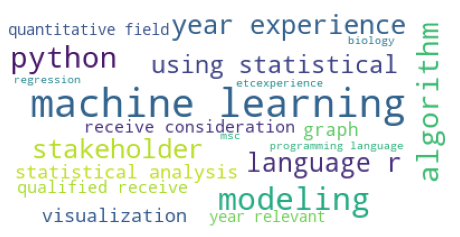

In [0]:
plt.figure(figsize = (8, 8), facecolor = None) 
wc_g1 = WordCloud(background_color="white").generate_from_frequencies(gen_dict_g1)
plt.axis("off") 
plt.imshow(wc_g1)

### 3.2.2 Banks and Financial Services:

In [0]:
bi_banks,uni_banks=cal_terms(df_banks)
value_banks,frequency_banks=clean_bi_uni(bi_banks,uni_banks)
gen_dict_banks=generate_dict(value_banks,frequency_banks)

In [0]:
#terms
gen_dict_banks.keys()

dict_keys(['year experience', 'statistical method', 'experience analysis', 'team scientist', 'benefit fully', 'fully paid', 'paid dental', 'dental premium', 'premium dependent', '401k match', 'dataset', 'modeling', 'python', 'wellness', 'domain', 'caregiver', 'gym', 'intuition', 'perk', 'technologist'])

In [0]:
#frequencies
gen_dict_banks.values()

dict_values([53, 25, 25, 24, 24, 24, 24, 24, 24, 24, 64, 36, 36, 25, 24, 24, 24, 23, 22, 22])

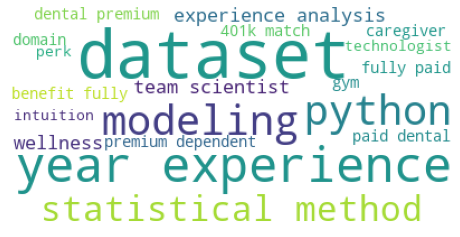

In [0]:
plt.figure(figsize = (8, 8), facecolor = None) 
wc_banks = WordCloud(background_color="white").generate_from_frequencies(gen_dict_banks)
plt.axis("off") 
plt.imshow(wc_banks)

### 3.2.3 Insurance:

In [0]:
bi_ins,uni_ins=cal_terms(df_ins)
value_ins,frequency_ins=clean_bi_uni(bi_ins,uni_ins)
gen_dict_ins=generate_dict(value_ins,frequency_ins)

In [0]:
#terms
gen_dict_ins.keys()

dict_keys(['machine learning', 'shell scripting', 'predictive modeling', 'statistic mathematics', 'decision tree', 'communication skill', 'dental vision', 'learning model', 'tool sql', 'python r', 'modeling', 'python', 'linux', 'hadoop', 'scripting', 'unix', 'familiarity', 'glm', 'passion', 'aws'])

In [0]:
#frequencies
gen_dict_ins.values()

dict_values([162, 78, 44, 41, 41, 41, 41, 40, 40, 40, 127, 84, 80, 79, 78, 41, 40, 40, 40, 39])

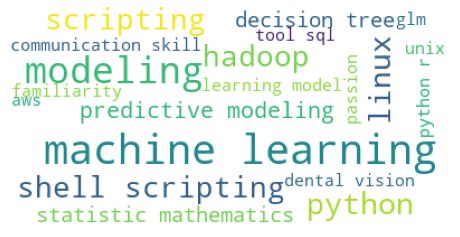

In [0]:
plt.figure(figsize = (8, 8), facecolor = None) 
wc_ins = WordCloud(background_color="white").generate_from_frequencies(gen_dict_ins)
plt.axis("off") 
plt.imshow(wc_ins)

### 3.2.4 Government:

In [0]:
bi_gov,uni_gov=cal_terms(df_gov)
value_gov,frequency_gov=clean_bi_uni(bi_gov,uni_gov)
gen_dict_gov=generate_dict(value_gov,frequency_gov)

In [0]:
#terms
gen_dict_gov.keys()

dict_keys(['relevant experience', 'machine learning', 'year relevant', 'degree plus', 'bike share', 'year experience', 'experience working', 'may considered', 'algorithm programming', 'math course', 'bike', 'algorithm', 'bachelor', 'math', 'python', 'transcript', 'dod', 'nsa', 'residency', 'specialization'])

In [0]:
#frequencies
gen_dict_gov.values()

dict_values([18, 15, 14, 12, 10, 9, 8, 8, 8, 8, 14, 11, 9, 8, 7, 6, 6, 6, 6, 6])

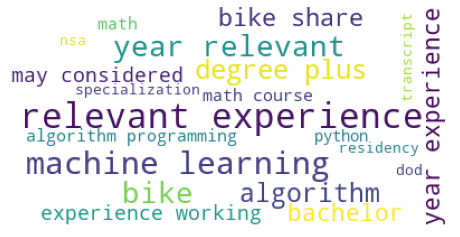

In [0]:
plt.figure(figsize = (8, 8), facecolor = None) 
wc_gov = WordCloud(background_color="white").generate_from_frequencies(gen_dict_gov)
plt.axis("off") 
plt.imshow(wc_gov)

### 3.2.5 Aerospace and Defense:

In [0]:
bi_aad,uni_aad=cal_terms(df_aad)
value_aad,frequency_aad=clean_bi_uni(bi_aad,uni_aad)
gen_dict_aad=generate_dict(value_aad,frequency_aad)

In [0]:
#terms
gen_dict_aad.keys()

dict_keys(['machine learning', 'modeling simulation', 'analyze interpret', 'exploratory analysis', 'innovative driven', 'driven exploratory', 'analysis complex', 'complex highdimensional', 'statistic machine', 'learning programming', 'modeling', 'python', 'algorithm', 'prototype', 'ts', 'hadoop', 'matlab', 'math', 'stack', 'infertility'])

In [0]:
#frequencies
gen_dict_aad.values()

dict_values([192, 112, 112, 111, 109, 109, 109, 109, 109, 109, 173, 141, 135, 111, 68, 65, 62, 60, 59, 58])

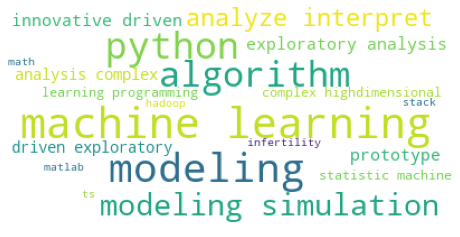

In [0]:
plt.figure(figsize = (8, 8), facecolor = None) 
wc_aad = WordCloud(background_color="white").generate_from_frequencies(gen_dict_aad)
plt.axis("off") 
plt.imshow(wc_aad)

### 3.2.6 Technology:

In [0]:
df_g2 =df_ias.append(df_comp)
df_g2.shape

(123, 12)

In [0]:
bi_g2,uni_g2=cal_terms(df_g2)
value_g2,frequency_g2=clean_bi_uni(bi_g2,uni_g2)
gen_dict_g2=generate_dict(value_g2,frequency_g2)

In [0]:
#terms
gen_dict_g2.keys()

dict_keys(['machine learning', 'scientist team', 'product manager', 'best practice', 'statistical machine', 'address using', 'closely team', 'learning learning', 'statistical significance', 'align leader', 'stakeholder', 'roadmap', 'stack', 'storytelling', 'takeaway', 'python', 'modeling', 'visualization', 'graph', 'ambiguity'])

In [0]:
#frequencies
gen_dict_g2.values()

dict_values([125, 76, 76, 75, 75, 71, 71, 71, 71, 70, 82, 73, 71, 70, 70, 36, 22, 19, 18, 15])

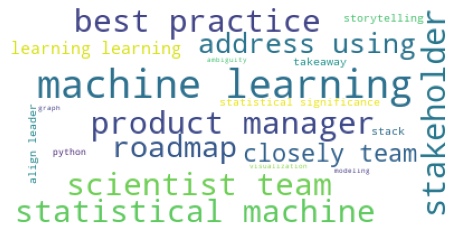

In [0]:
plt.figure(figsize = (8, 8), facecolor = None) 
wc_g2 = WordCloud(background_color="white").generate_from_frequencies(gen_dict_g2)
plt.axis("off") 
plt.imshow(wc_g2)

### 3.2.7 Consulting and Business Services:

In [0]:
bi_cosult,uni_consult=cal_terms(df_consult)
value_consult,frequency_consult=clean_bi_uni(bi_cosult,uni_consult)
gen_dict_consult=generate_dict(value_consult,frequency_consult)

In [0]:
#terms
gen_dict_consult.keys()

dict_keys(['machine learning', 'year experience', 'reston va', 'plus experience', 'qualified receive', 'receive consideration', 'natural language', 'experience tool', 'language processing', 'required bachelor', 'algorithm', 'python', 'bachelor', 'reston', 'nlp', 'visualization', 'apache', 'scala', 'scikit', 'description'])

In [0]:
#frequencies
gen_dict_consult.values()

dict_values([237, 85, 78, 78, 66, 66, 55, 54, 53, 52, 144, 112, 85, 78, 50, 48, 47, 45, 45, 43])

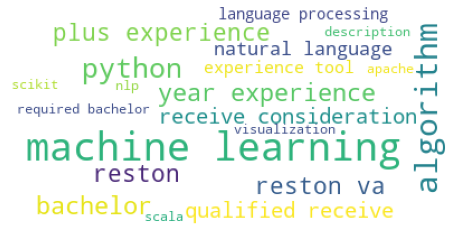

In [0]:
plt.figure(figsize = (8, 8), facecolor = None) 
wc_consult = WordCloud(background_color="white").generate_from_frequencies(gen_dict_consult)
plt.axis("off") 
plt.imshow(wc_consult)

# 4) Chi2 Test of independence

## 4.1 Chi2 Test of Independence for Cities and Terms

In [0]:
#Import libraries
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [0]:
#Create list with all unique keys/terms 
all_keys = []

for key in gen_dict_dc.keys():
    if key in all_keys:
        continue
    else:
        all_keys.append(key)

for key in gen_dict_ny.keys():
    if key in all_keys:
        continue
    else:
        all_keys.append(key)

for key in gen_dict_austin.keys():
    if key in all_keys:
        continue
    else:
        all_keys.append(key)

for key in gen_dict_sf.keys():
    if key in all_keys:
        continue
    else:
        all_keys.append(key)

for key in gen_dict_la.keys():
    if key in all_keys:
        continue
    else:
        all_keys.append(key)

for key in gen_dict_ch.keys():
    if key in all_keys:
        continue
    else:
        all_keys.append(key)

print(len(all_keys))

80


In [0]:
#Create a list per city with all values for all unique keys/terms
all_values_dc = []
for key in all_keys:
    if key in gen_dict_dc.keys():
        value = gen_dict_dc[key] * (581/581)
    else:
        value = 1
    all_values_dc.append(value)
print(len(all_values_dc))

all_values_ny = []
for key in all_keys:
    if key in gen_dict_ny.keys():
        value = gen_dict_ny[key] * (581/357)
    else:
        value = 1
    all_values_ny.append(value)
print(len(all_values_ny))

all_values_au = []
for key in all_keys:
    if key in gen_dict_austin.keys():
        value = gen_dict_austin[key] * (581/325)
    else:
        value = 1
    all_values_au.append(value)
print(len(all_values_au))

all_values_sf = []
for key in all_keys:
    if key in gen_dict_sf.keys():
        value = gen_dict_sf[key] * (581/149)
    else:
        value = 1
    all_values_sf.append(value)
print(len(all_values_sf))

all_values_la = []
for key in all_keys:
    if key in gen_dict_la.keys():
        value = gen_dict_la[key] * (581/71)
    else:
        value = 1
    all_values_la.append(value)
print(len(all_values_la))

all_values_ch = []
for key in all_keys:
    if key in gen_dict_ch.keys():
        value = gen_dict_ch[key] * (581/67)
    else:
        value = 1
    all_values_ch.append(value)
print(len(all_values_ch))

80
80
80
80
80
80


In [0]:
#create dataframe-contingency table
df_cities = pd.DataFrame([all_values_dc, all_values_ny, all_values_au, all_values_sf, all_values_la, all_values_ch], index=['DC', 'NY', 'AU', 'SF', 'LA', 'CH'], columns=all_keys)
df_cities.shape

(6, 80)

In [0]:
#run chi2 test, print results and evaluation
chi, pval, dof, exp = chi2_contingency(df_cities)
significance = 0.01
p = 1 - significance
critical_value = chi2.ppf(p, dof)
print('p-value=%.6f, chi=%.6f, critical value=%.6f\n' % (pval, chi, critical_value))
if chi > critical_value:
    print("""At %.2f level of significance, we reject the null hypotheses and accept H1. 
They are not independent.""" % (significance))
else:
    print("""At %.2f level of significance, we accept the null hypotheses. 
They are independent.""" % (significance))

p-value=0.000000, chi=63668.997335, critical value=463.311853

At 0.01 level of significance, we reject the null hypotheses and accept H1. 
They are not independent.


## 4.2 Chi2 Test of Independence for Industries and Terms

In [0]:
#Create list with all unique keys/terms 
all_keys2 = []

for key in gen_dict_g1.keys():
    if key in all_keys2:
        continue
    else:
        all_keys2.append(key)

for key in gen_dict_banks.keys():
    if key in all_keys2:
        continue
    else:
        all_keys2.append(key)

for key in gen_dict_ins.keys():
    if key in all_keys2:
        continue
    else:
        all_keys2.append(key)

for key in gen_dict_gov.keys():
    if key in all_keys2:
        continue
    else:
        all_keys2.append(key)

for key in gen_dict_aad.keys():
    if key in all_keys2:
        continue
    else:
        all_keys2.append(key)

for key in gen_dict_g2.keys():
    if key in all_keys2:
        continue
    else:
        all_keys2.append(key)

for key in gen_dict_consult.keys():
    if key in all_keys2:
        continue
    else:
        all_keys2.append(key)

print(len(all_keys2))

108


In [0]:
#Create a list per industry with all values for all unique keys/terms
all_values_g1 = []
for key in all_keys2:
    if key in gen_dict_g1.keys():
        value = gen_dict_g1[key] * (136/20)
    else:
        value = 1
    all_values_g1.append(value)
print(len(all_values_g1))

all_values_banks = []
for key in all_keys2:
    if key in gen_dict_banks.keys():
        value = gen_dict_banks[key] * (136/42)
    else:
        value = 1
    all_values_banks.append(value)
print(len(all_values_banks))

all_values_ins = []
for key in all_keys2:
    if key in gen_dict_ins.keys():
        value = gen_dict_ins[key] * (136/48)
    else:
        value = 1
    all_values_ins.append(value)
print(len(all_values_ins))

all_values_gov = []
for key in all_keys2:
    if key in gen_dict_gov.keys():
        value = gen_dict_gov[key] * (136/10)
    else:
        value = 1
    all_values_gov.append(value)
print(len(all_values_gov))

all_values_aad = []
for key in all_keys2:
    if key in gen_dict_aad.keys():
        value = gen_dict_aad[key] * (136/92)
    else:
        value = 1
    all_values_aad.append(value)
print(len(all_values_aad))

all_values_g2 = []
for key in all_keys2:
    if key in gen_dict_g2.keys():
        value = gen_dict_g2[key] * (136/123)
    else:
        value = 1
    all_values_g2.append(value)
print(len(all_values_g2))

all_values_consult = []
for key in all_keys2:
    if key in gen_dict_consult.keys():
        value = gen_dict_consult[key] * (136/136)
    else:
        value = 1
    all_values_consult.append(value)
print(len(all_values_consult))


108
108
108
108
108
108
108


In [0]:
#create dataframe-contingency table
df_industries = pd.DataFrame([all_values_g1, all_values_banks, all_values_ins, all_values_gov, all_values_aad, all_values_g2, all_values_consult], index=['Healthcare', 'Banks', 'Insurance', 'Government', 'Aerospace & Defense', 'Technology', 'Consulting'], columns=all_keys2)
df_industries.shape

(7, 108)

In [0]:
#run chi2 test, print results and evaluation
chi, pval, dof, exp = chi2_contingency(df_industries)
significance = 0.01
p = 1 - significance
critical_value = chi2.ppf(p, dof)
print('p-value=%.6f, chi=%.6f, critical value=%.6f\n' % (pval, chi, critical_value))
if chi > critical_value:
    print("""At %.2f level of significance, we reject the null hypotheses and accept H1. 
They are not independent.""" % (significance))
else:
    print("""At %.2f level of significance, we accept the null hypotheses. 
They are independent.""" % (significance))

p-value=0.000000, chi=54441.511564, critical value=728.288884

At 0.01 level of significance, we reject the null hypotheses and accept H1. 
They are not independent.
